In [1]:
# mporting library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the dataset
dataset = pd.read_csv("crop_recommendation.csv")
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
# check size of dataset
dataset.shape

(2200, 8)

In [4]:
# check the number of non-values in each column
dataset.count(0)

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [5]:
# check the number of non-values in each row
dataset.count(1)

0       8
1       8
2       8
3       8
4       8
       ..
2195    8
2196    8
2197    8
2198    8
2199    8
Length: 2200, dtype: int64

In [6]:
# create a dictionary containing the crop and its count
label_count = dict(dataset['label'].value_counts())
print(label_count)

{'muskmelon': 100, 'coffee': 100, 'mango': 100, 'banana': 100, 'pigeonpeas': 100, 'papaya': 100, 'blackgram': 100, 'rice': 100, 'lentil': 100, 'kidneybeans': 100, 'mungbean': 100, 'chickpea': 100, 'grapes': 100, 'pomegranate': 100, 'orange': 100, 'mothbeans': 100, 'apple': 100, 'watermelon': 100, 'maize': 100, 'jute': 100, 'coconut': 100, 'cotton': 100}


In [7]:
label_count = dataset['label'].value_counts()
print(label_count.index)
label_count

Index(['muskmelon', 'coffee', 'mango', 'banana', 'pigeonpeas', 'papaya',
       'blackgram', 'rice', 'lentil', 'kidneybeans', 'mungbean', 'chickpea',
       'grapes', 'pomegranate', 'orange', 'mothbeans', 'apple', 'watermelon',
       'maize', 'jute', 'coconut', 'cotton'],
      dtype='object')


muskmelon      100
coffee         100
mango          100
banana         100
pigeonpeas     100
papaya         100
blackgram      100
rice           100
lentil         100
kidneybeans    100
mungbean       100
chickpea       100
grapes         100
pomegranate    100
orange         100
mothbeans      100
apple          100
watermelon     100
maize          100
jute           100
coconut        100
cotton         100
Name: label, dtype: int64

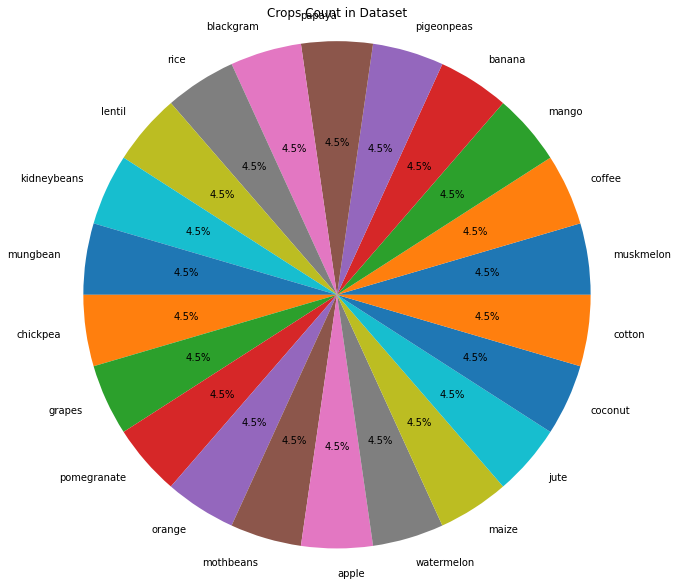

In [8]:
# Draw a pie chart with the values above
plt.figure(figsize=(10, 10))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')
plt.title('Crops Count in Dataset')
plt.axis('equal')
plt.show()

In [9]:
# # Exploratory data analysis with pandas profiling
# import pandas_profiling

# profile = dataset.profile_report(title='Crop Profiling Report')
# profile

In [10]:
# Features Extraction
X = dataset.iloc[:, :-1].values
y = dataset. iloc [:, -1].values
print(X)
print(y)

[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [118.          33.          30.         ...  67.22512329   6.36260785
  173.3228386 ]
 [117.          32.          34.         ...  52.12739421   6.75879255
  127.1752928 ]
 [104.          18.          30.         ...  60.39647474   6.77983261
  140.9370415 ]]
['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


In [11]:
# label encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)
y1

array([20, 20, 20, ...,  5,  5,  5])

In [78]:
# sorting the target variable
y_sort = list(np.sort(y))
# print(y_sort)

labely = {}
c = 0
for i in y_sort:
    if i in list(labely.values()):
        continue
    else:
        labely.update({c:i})
        c +=1
print(labely)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [12]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=22, stratify=y1)

In [13]:
print(X_train)
print(y_train)
print("-------------------")
print(X_test)
print(y_test)

[[ 37.           5.          34.         ...  93.84150618   5.77903267
  152.4238712 ]
 [ 50.          55.          16.         ...  65.33538112   7.58144289
   62.26242533]
 [ 16.          73.          19.         ...  34.80541039   4.68407925
  163.2747473 ]
 ...
 [ 60.          44.          23.         ...  70.04556743   5.72257982
   76.72860067]
 [  5.          74.          21.         ...  21.35793891   5.59170401
   66.97053257]
 [  1.           6.          35.         ...  95.71935435   6.23166277
  147.1682459 ]]
[ 4  2 18 ... 11  9  4]
-------------------
[[103.          40.          30.         ...  55.196224     6.34831626
  141.4831644 ]
 [ 91.          36.          45.         ...  82.45432595   5.95064758
  267.9761948 ]
 [ 34.          29.           8.         ...  91.15248149   6.45064031
  105.3437825 ]
 ...
 [ 39.           9.          15.         ...  91.81183218   7.99204198
  116.7555937 ]
 [  3.          23.          30.         ...  95.65754365   6.07880724
  21

In [14]:
len(y_train)

1760

In [15]:
len(y_test)

440

In [34]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.36943003 -1.47645357 -0.28054483 ...  1.00536356 -0.90598309
   0.89194082]
 [-0.01741607  0.04317116 -0.63606546 ... -0.27392003  1.43663114
  -0.75250599]
 [-0.93806794  0.59023606 -0.57681202 ... -1.64402875 -2.32910721
   1.08984901]
 ...
 [ 0.25336389 -0.29114628 -0.49780744 ... -0.06253865 -0.97935553
  -0.48865867]
 [-1.2359259   0.62062855 -0.53730973 ... -2.24751764 -1.14945639
  -0.66663523]
 [-1.34423789 -1.44606107 -0.26079368 ...  1.08963669 -0.31769431
   0.79608393]]
[[ 1.41771772 -0.41271626 -0.35954942 ... -0.72894004 -0.16607836
   0.69239422]
 [ 1.09278177 -0.53428624 -0.06328222 ...  0.4943354  -0.68293313
   2.99948966]
 [-0.45066401 -0.7470337  -0.79407463 ...  0.88468686 -0.03308657
   0.03325116]
 ...
 [-0.31527403 -1.35488359 -0.65581661 ...  0.91427687  1.97029172
   0.24139019]
 [-1.29008189 -0.92938867 -0.35954942 ...  1.08686278 -0.51636247
   2.03685091]
 [ 1.09278177 -0.56467873 -0.1817891  ...  0.40295824  0.6430489
   1.87387494]]


# Training with Logistic Regression

In [44]:
# Training ith Logitic Regreion
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([ 5, 20, 16,  8, 19, 13, 15,  9, 15, 16, 14, 12, 20,  1, 18, 15,  1,
        2,  5,  2,  4,  4,  9,  3, 10,  3,  2, 19, 12,  4, 14,  8,  4, 21,
       13,  8, 16, 15, 21,  2,  5, 13,  7, 17, 10,  8,  2,  6, 10,  3, 19,
        0, 13,  1, 19, 16, 14, 14, 15, 13, 19,  8, 11, 10, 19,  5, 18,  2,
       18,  2, 14, 21, 12, 10,  6, 13,  0,  3, 21,  4, 12,  1,  9,  3, 21,
        8,  6, 15, 11, 16,  1,  9, 11, 16,  1, 18,  4, 14,  4,  0, 11,  0,
        9, 21,  7, 16, 21, 14, 11, 12,  7,  2,  8, 14,  2, 20,  0,  3, 11,
       18, 16,  8, 21, 19, 11, 21, 12,  5, 16, 10, 11,  6,  0,  6,  1,  9,
        5, 17,  1,  7,  7,  9, 10, 16, 11,  3, 19, 15, 12,  0, 15,  2,  1,
       21, 17,  7, 10,  6, 19, 21, 12, 20, 11, 17, 14,  5, 10, 15, 18, 12,
        4, 15, 13, 18, 20,  9,  7, 10, 19,  8,  0,  5,  6, 13,  5, 17, 11,
        0, 17,  9,  6,  3, 13, 19,  5, 13, 11,  3,  2, 12, 12, 14,  9,  5,
        4, 13,  7, 14, 20, 16,  1,  0,  4, 12,  3,  9, 21, 18, 16,  2, 21,
        0,  9,  4,  3, 18

In [ ]:
# creating confuion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

acc = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)

print("Accuracy score", acc)
# print("Precision score", precision)
# print("Recall score", recall)
print(classification_report(y_test, y_pred))

Accuracy score 0.9636363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00        20
           8       0.86      0.90      0.88        20
           9       0.95      0.95      0.95        20
          10       0.95      0.90      0.92        20
          11       0.95      1.00      0.98        20
          12       0.95      1.00      0.98        20
          13       0.95      0.90      0.92        20
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00    

# Training with SVM linear kernel

In [47]:
# Training ith upport Vector Machine
from sklearn.svm import SVC
model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = model1.predict(X_test)
y_pred

array([ 5, 20, 16,  8, 19, 13, 15,  9, 15, 16, 14, 12, 20,  1, 18, 15,  1,
       10,  5,  2,  4,  4,  9,  3, 10,  3,  2, 19, 12,  4, 14,  8,  4, 21,
       13,  8, 16, 15, 21,  2,  5, 10,  7, 17, 10,  8,  2,  6, 10,  3, 19,
        0, 13,  1, 19, 16, 14, 14, 15, 13, 19,  8, 11, 10, 19,  5, 18,  2,
       18,  2, 14, 21, 12, 10,  6, 13,  0,  3, 21,  4, 12,  1,  9,  3, 21,
        8,  6, 15, 11, 16,  1,  9, 11, 16,  1, 18,  4, 14,  4,  0, 11,  0,
        9, 21,  7, 16, 21, 14, 11, 12,  7,  2,  8, 14,  2, 20,  0,  3, 11,
       18, 16,  8, 21, 19, 11, 21, 13,  5, 16, 10, 11,  6,  0,  6,  1,  9,
        5, 17,  1,  7,  7,  9, 10, 16, 11,  3, 19, 15, 12,  0, 15,  2,  1,
       21, 17,  7, 10,  6, 19, 21, 12, 20, 11,  8, 14,  5, 10, 15, 18, 12,
        4, 15, 13, 18, 20,  9,  7, 10, 19,  8,  0,  5,  6, 13,  5, 17, 11,
        0, 17,  9,  6,  3, 13, 19,  5, 13, 11,  3,  2, 12, 12, 14,  9,  5,
        4, 13,  7, 14, 20, 16,  1,  0,  4, 12,  3,  9, 21, 18, 16,  2, 21,
        0,  9,  4,  3, 18

In [41]:
# creating confuion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [42]:
acc = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)

print("Accuracy score", acc)
# print("Precision score", precision)
# print("Recall score", recall)
print(classification_report(y_test, y_pred))

Accuracy score 0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.90      0.95      0.93        20
           9       0.95      1.00      0.98        20
          10       0.95      1.00      0.98        20
          11       1.00      1.00      1.00        20
          12       0.95      1.00      0.98        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00    

# Training with SVM rbf kernel

In [49]:
# Training with upport Vector Machine
from sklearn.svm import SVC
model2 = SVC(kernel='rbf')
model2.fit(X_train, y_train)

SVC()

In [50]:
y_pred = model2.predict(X_test)
print(y_pred)

[ 5 20 16  8 19 13 15  9 15 16 14 12  8  1 18 15  1  2  5  2  4  4  9  3
 10  3  2 19 12  4 14  8  4 21 13  8 16 15 21  2  5 10  7 17 10  8  2  6
 10  3 19  0 13  1 19 16 14 14 15 13 19  8 11 10 19  5 18  2 18  2 14 21
 12 10  6 13  0  3 21  4 12  1  9  3 21  8  6 15 11 16  1  9 11 16  1 18
  4 14  4  0 11  0  9 21  7 16 21 14 11 12  7  2  8 14  2 20  0  3 11 18
 16  8 21 19 11 21 13  5 16 10 11  6  0  6  1  9  5 17  1  7  7  9 10 16
 11  3 19 15 12  0 15  2  1 21 17  7 10  6 19 21 12 20 11  8 14  5 10 15
 18 12  4 15 13 18 20  9  7 10 19  8  0  5  6 13  5 17 11  0 17  9  6  3
 13 19  5 13 11  3  2 12 12 14  9  5  4 13  7 14 20 16  1  0  4 12  3  9
 21 18 16  2 21  0  9  4  3 18 10  4 13  8  0 12 20  8 10 19  5  2 13  6
  4  8 20 17 14 20 11  1  4 10  7  6 18  0  3 18  0 20  7 18 11  0  8  6
  1  4  9  1  5  7 12  1  3  0 17  9 15 18 21  9 20 17 15 20  5 21  3 14
  6 17 11 16 12  9  6 16 13  0  0  1 20 20 13 10  3 12 13 15 15  4  2 17
 17 14 16 19 10  7  1 17  5 17  6 15 19  3  2  8  1

In [51]:
# creating confuion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [52]:
acc = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)

print("Accuracy score", acc)
# print("Precision score", precision)
# print("Recall score", recall)
print(classification_report(y_test, y_pred))

Accuracy score 0.9840909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.83      1.00      0.91        20
           9       1.00      1.00      1.00        20
          10       0.95      0.95      0.95        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00    

# Training with SVM sigmoid kernel

In [53]:
# Training with upport Vector Machine
from sklearn.svm import SVC
model3 = SVC(kernel='sigmoid')
model3.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [54]:
y_pred = model3.predict(X_test)
print(y_pred)

[ 5 20 16  8 19 13 15  9 15 16 13 12 20  1 18 15  1  2  5  2  4  4  9  3
 10  3  2 19 12  4 13 20  4 21  2  8 19 15 21  2  5 13  0 17 10 20  2  6
 10  3 19  7 12  1 19 19 14 14 15  2 19 20 11 10 19  5 18  2 13 13 14 21
 12 10  6 13  0  3 21  4 12  1  9  3 21  8  6 15 11 19  1  9 11 16  1 18
  4 14  4  0 11  0  9 21  7 19 21 14 11 12  0  2  8 13 13 20  0  3 11 18
 16 20 21 19 11 21 12  5 16 13 11  6  0  6  1  9  5 17  1  0  0  9 13 16
 11  3 19 15 12  0 15 13  1 21 17  0 10  6 16 21 12  8 11 17 14  5 10 15
  9 12  4 15 13 18 20  9  7 10 19  8  0  5  6  2  5 17 11  0 17  9  6  3
  2 19  5 10 11  3  2 12 12 13  9  5  4 12  0 14 20 19  1  0  4 13  3  9
 21 18  4  2 21  7  9  4  3 18 10  4 13 20  0 13 20  8 13 19  5  2  2  6
  4  8 20 17 14 20 11  1  4 13  7  6 18  0  3 18  7 20  7  2 11  0  8  6
  1  4  9  1  5  0 12  1  3  0 17  9 15 18 21  9 20 17 15 20  5 21  3 14
  6 17 11 19 12  9  6 16  2  0  0  1  8 20 13 13  3 12 12 15 15  4  2 17
 17 14 19 19 10  0  1 17  5 17  6 15 19  3  2  8  1

In [55]:
# creating confuion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  1  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 13  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  4  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  1  2  0  4  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [56]:
acc = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)

print("Accuracy score", acc)
# print("Precision score", precision)
# print("Recall score", recall)
print(classification_report(y_test, y_pred))

Accuracy score 0.8136363636363636
              precision    recall  f1-score   support

           0       0.57      0.85      0.68        20
           1       1.00      1.00      1.00        20
           2       0.59      0.65      0.62        20
           3       1.00      1.00      1.00        20
           4       0.95      0.95      0.95        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.70      0.35      0.47        20
           8       0.76      0.65      0.70        20
           9       0.86      0.95      0.90        20
          10       0.87      0.65      0.74        20
          11       1.00      1.00      1.00        20
          12       0.80      0.80      0.80        20
          13       0.24      0.35      0.29        20
          14       1.00      0.80      0.89        20
          15       1.00      1.00      1.00        20
          16       0.79      0.55      0.65    

# Training with KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
# accuracy on X_test
accuracy = model4.score(X_test, y_test)
accuracy

0.975

In [61]:
y_pred = model4.predict(X_test)
print(y_pred)

[ 5 20 16  8 19 13 15  9 15 16 14 12 20  1 18 15  1  2  5  2  4  4  9  3
 10  3  2 19 12  4 14  8  4 21 13  8 16 15 21  2  5 10  7 17 10  8  2  6
 10  3 19  0 13  1 19 16 14 14 15 13 19  8 11 10 19  5 18  2 18  2 14 21
 12 10  6  2  0  3 21  4 12  1  9  3 21  8  6 15 11 16  1  9 11 16  1 18
  4 14  4  0 11  0  9 21  7 16 21 14 11 12  7  2  8 14  2 20  0  3 11 18
 16  8 21 19 11 21 13  5 16 10 11  6  0  6  1  9  5 17  1  7  7  9 10 19
 11  3 19 15 12  0 15  2  1 21 17  7 10  6 19 21 12 20 11  8 14  5 10 15
 18 12  4 15 13 18 20  9  7 10 19  8  0  5  6 13  5 17 11  0 17  9  6  3
 13 19  5 13 11  3  2 12 12 14  9  5  4 13  7 14 20 16  1  0  4 12  3  9
 21 18 16  2 21  0  9  4  3 18 10  4 13  8  0 12 20  8 10 19  5  2 13  6
  4  8 20 17 14 20 11  1  4 10  7  6 18  0  3 18  0 20  7 10 11  0  8  6
  1  4  9  1  5  7 12  1  3  0 17  9 15 18 21  9 20 17 15 20  5 21  3 14
  6 17 11 16 12  9  6 16 13  0  0  1 20 20 13 10  3 12 13 15 15  4  2 17
 17 14 16 19 10  7  1 17  5 17  6 15 19  3  2  8  1

In [62]:
# creating confuion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [63]:
acc = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)

print("Accuracy score", acc)
# print("Precision score", precision)
# print("Recall score", recall)
print(classification_report(y_test, y_pred))

Accuracy score 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.86      0.95      0.90        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.83      1.00      0.91        20
           9       1.00      1.00      1.00        20
          10       0.90      0.95      0.93        20
          11       1.00      1.00      1.00        20
          12       0.95      1.00      0.98        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.95      0.97        20
      